# Makine Öğrenmesi - Doğrusal Regresyon Modelleri

## Basit Doğrusal Regresyon 

### Model

In [ ]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df = pd.read_csv("./dogRegMod/Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

In [ ]:
df.info()

In [ ]:
import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[["TV"]]

In [ ]:
X.head()

In [ ]:
y = df[["sales"]]

In [ ]:
reg = LinearRegression()

In [ ]:
model = reg.fit(X, y)

In [ ]:
model

In [ ]:
str(model)

In [ ]:
dir(model)

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
#rkare
model.score(X,y)

### Tahmin

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

Sales = 7.03 + 0.05*TV

In [ ]:
model.intercept_ + model.coef_*165

In [ ]:
model.predict([[165]])

In [ ]:
yeni_veri = [[5],[15],[30]]

In [ ]:
model.predict(yeni_veri)

## Artıklar ve Makine Öğrenmesindeki Önemi

**MSE: Hata Kareler Ortalaması**

**RMSE: Hata Kareler Ortalamasının Karekökü**

In [ ]:
y.head()

In [ ]:
model.predict(X)[0:6]

In [ ]:
gercek_y = y[0:10]

In [ ]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [ ]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis = 1)

In [ ]:
hatalar.columns = ["gercek_y","tahmin_edilen_y"]

In [ ]:
hatalar

In [ ]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [ ]:
hatalar

In [ ]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [ ]:
hatalar

In [ ]:
np.mean(hatalar["hata_kareler"])

## Çoklu Doğrusal Regresyon

### Model

In [ ]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df = pd.read_csv("./dogRegMod/Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

In [ ]:
X = df.drop('sales', axis=1)
y = df[["sales"]]

In [ ]:
y.head()

In [ ]:
X.head()

In [ ]:
#Statsmodels ile model kurmak

In [ ]:
import statsmodels.api as sm

In [ ]:
lm = sm.OLS(y, X)

In [ ]:
model = lm.fit()

In [ ]:
model.summary()

In [ ]:
##scikit learn ile model kurmak

In [ ]:
from sklearn.linear_model import LinearRegression
lm  = LinearRegression()

In [ ]:
model = lm.fit(X, y)

In [ ]:
model.intercept_

In [ ]:
model.coef_

## Tahmin

**Sales = 2.94 + TV * 0.04 + radio * 0.19 - newspaper * 0.001**

30 birim TV, 10 birim radio, 40 birim gazete 

In [ ]:
2.94 + 30 * 0.04 + 10 * 0.19 - 40 * 0.001

In [ ]:
yeni_veri = [[300],[120],[400]]

In [ ]:
import pandas as pd
yeni_veri = pd.DataFrame(yeni_veri).T

In [ ]:
yeni_veri

In [ ]:
model.predict(yeni_veri)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y.head()

In [ ]:
model.predict(X)[0:10]

In [ ]:
MSE = mean_squared_error(y, model.predict(X))
MSE

In [ ]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

### Model Tuning (Model Doğrulama)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
#sinama seti
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [ ]:
#egitim hatasi
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [ ]:
#test hatasi
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [ ]:
#k-katlı cv

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")

In [ ]:
#cv mse
np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

In [ ]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

In [ ]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_squared_error")))

# Ridge Regresyon

### Gerekli Kütüphaneler

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

### Veri Seti

In [ ]:
df = pd.read_csv("./dogRegMod/Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
ridge_model = Ridge(alpha = 5).fit(X_train, y_train)

In [ ]:
ridge_model

In [ ]:
ridge_model.coef_

In [ ]:
ridge_model.intercept_

In [ ]:
np.linspace(10,-2,100)

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [ ]:
lambdalar

In [ ]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    

In [ ]:
katsayilar

In [ ]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale("log")

## Tahmin

In [ ]:
ridge_model = Ridge().fit(X_train, y_train)

In [ ]:
y_pred = ridge_model.predict(X_train)

In [ ]:
y_pred[0:10]

In [ ]:
y_train[0:10]

In [ ]:
#train hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

In [ ]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

In [ ]:
#test hatası
y_pred = ridge_model.predict(X_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

## Model Tuning

**Neden Model Tuning?**

In [ ]:
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
np.random.randint(0,1000,100)

In [ ]:
lambdalar1 = np.random.randint(0,1000,100)

In [ ]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [ ]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

In [ ]:
ridgecv.alpha_

In [ ]:
#final modeli 

In [ ]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [ ]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# Lasso Regresyon

### Gerekli Kütüphaneler

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

### Veri Seti

In [2]:
df = pd.read_csv("./dogRegMod/Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
df.shape

(263, 20)

In [5]:
lasso_model = Lasso().fit(X_train, y_train)

/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850384, tolerance: 3898.686956380658
  positive)


In [6]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
lasso_model.intercept_

-5.587450677335028

In [8]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [ ]:
#farklı lambda degerlerine karsilik katsayilar

In [13]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679515183, tolerance: 3898.686956380658
  positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.7561374865472, tolerance: 3898.686956380658
  positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase th

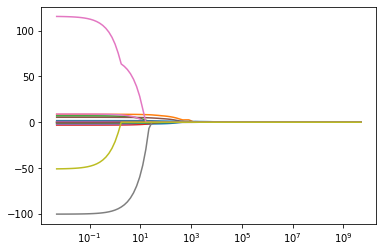

In [14]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

## Tahmin

In [15]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [17]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [18]:
y_pred = lasso_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554031

In [20]:
r2_score(y_test, y_pred)

0.41422798132366234

## Model Tuning

In [29]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [30]:
lasso_cv_model = LassoCV(alphas = alphas, cv = 10, max_iter = 100000).fit(X_train, y_train)

In [31]:
lasso_cv_model.alpha_

201.85086292982749

In [32]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [33]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [34]:
y_pred = lasso_tuned.predict(X_test)

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.68327080374473

In [36]:
pd.Series(lasso_tuned.coef_, index = X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# ElasticNet Regresyon Modeli

### Gerekli Kütüphaneler

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

### Veri Seti

In [38]:
df = pd.read_csv("./dogRegMod/Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [39]:
enet_model = ElasticNet().fit(X_train, y_train)

/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.79936731, tolerance: 3898.686956380658
  positive)


In [40]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [41]:
enet_model.intercept_

-6.465955602112672

In [43]:
#tahmin
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [44]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [45]:
y_pred = enet_model.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181245

In [47]:
r2_score(y_test, y_pred)

0.4107022246932689

## Model Tuning

In [57]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [59]:
enet_cv_model = ElasticNetCV(alphas = alphas, cv = 10).fit(X_train, y_train)

/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3249.9483078774065, tolerance: 3241.4244490642723
  tol, rng, random, positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4337.0031515117735, tolerance: 3241.4244490642723
  tol, rng, random, positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5751.424793953076, tolerance: 3241.4244490642723
  tol, rng, random, positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning:

In [60]:
enet_cv_model.alpha_

5748.784976988678

In [61]:
enet_cv_model.intercept_

-31.463121225641316

In [62]:
enet_cv_model.coef_

array([ 0.61111381,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11212622,  0.        ,
        0.25252702,  0.18656722,  0.00444355,  0.30988823,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [ ]:
#final modeli

In [63]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)

In [64]:
y_pred = enet_tuned.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

393.9753065850553

In [56]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read more i